CNN using finger component rotations

In [1]:
# Seed value
seed_value = 1

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
seed_value += 1

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
seed_value += 1

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
seed_value += 1

# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical
from utils.parseData import ReadData

In [3]:
def GetData(path="./data/", augment=False):
    all_data = ReadData(path)
    
    if augment:
        all_data = AugmentData(all_data)
    
    labels = all_data[:, :1]
    data = all_data[:, 8:]
    
    return labels, data

In [4]:
def AugmentData(data):
    augmented_data = np.array(data)
    for i in range(augmented_data.shape[0]):
        for j in range(7, 72):
            random.seed(i * j)
            random_v = random.random()
            augmented_data[i][j] = augmented_data[i][j] + (-1.0 + (random_v * (1.0 + 1.0)))
    full_data = np.concatenate((data, augmented_data), axis=0)
    return full_data

In [5]:
path = "./data/"
labels, data = GetData(path=path, augment=False)

df = pd.DataFrame(data) # for visualising
df

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,122.989521,5.031775,32.396511,154.947733,2.893299,48.086895,145.477856,-8.119449,46.227878,159.286507,...,-67.582787,-125.367848,-72.437172,-50.852973,-96.587422,-79.767570,-67.930081,-70.781021,-70.997175,-87.361629
1,135.335277,22.762292,47.132208,171.382518,45.664967,57.643169,-179.805451,40.565404,84.301659,-141.818159,...,-102.868148,83.136421,15.529929,90.343455,78.789987,5.173831,90.525847,72.386893,-4.364089,104.625646
2,141.891296,28.615349,54.489470,-178.385441,47.452724,69.867222,-175.951196,39.809274,87.187351,-148.173224,...,-109.162265,82.213256,36.904574,89.425871,76.610167,22.542002,89.209393,73.080910,-3.183434,110.232384
3,141.153613,28.042486,53.670653,-179.465062,47.739280,68.566937,-177.858053,40.358214,84.582835,-146.893964,...,-105.087837,83.791429,7.936759,89.145902,79.618323,-2.325866,93.411176,73.203217,-12.320351,108.900585
4,123.134389,5.315064,32.581669,155.111402,2.412084,48.602000,145.787989,-9.715883,45.043492,160.383255,...,-66.555146,-124.152353,-72.004125,-51.785051,-94.026793,-73.783497,-70.421552,-73.377815,-68.075547,-86.260239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,126.284136,10.933279,36.509585,159.832867,15.554000,49.226677,149.453368,3.425043,44.228799,158.248934,...,-84.465314,-101.813423,-40.555092,-74.267011,-88.874181,-33.688779,-68.891507,67.960503,37.844303,106.596725
376,123.119276,5.285622,32.562380,155.374277,7.566617,46.185854,145.732616,-4.128667,43.239427,156.146031,...,-84.698626,-103.643026,-48.000014,-72.690766,-88.437862,-35.001295,-70.236169,68.232502,34.305546,104.609253
377,148.736027,33.090179,62.008317,-169.602029,44.137764,80.102036,-157.517192,29.838664,115.198894,-136.338486,...,90.628198,-101.577734,-35.492179,-73.633540,-85.879244,-23.011290,-70.413436,73.377557,4.648314,110.603361
378,149.019953,33.246508,62.317644,-169.710133,42.346807,80.046248,-170.968666,33.361283,93.541873,-152.682945,...,103.415909,-101.373713,-32.576063,-70.264926,-88.666529,-47.489268,-68.730335,-76.476354,-46.016645,-71.185372


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=2, stratify=labels)

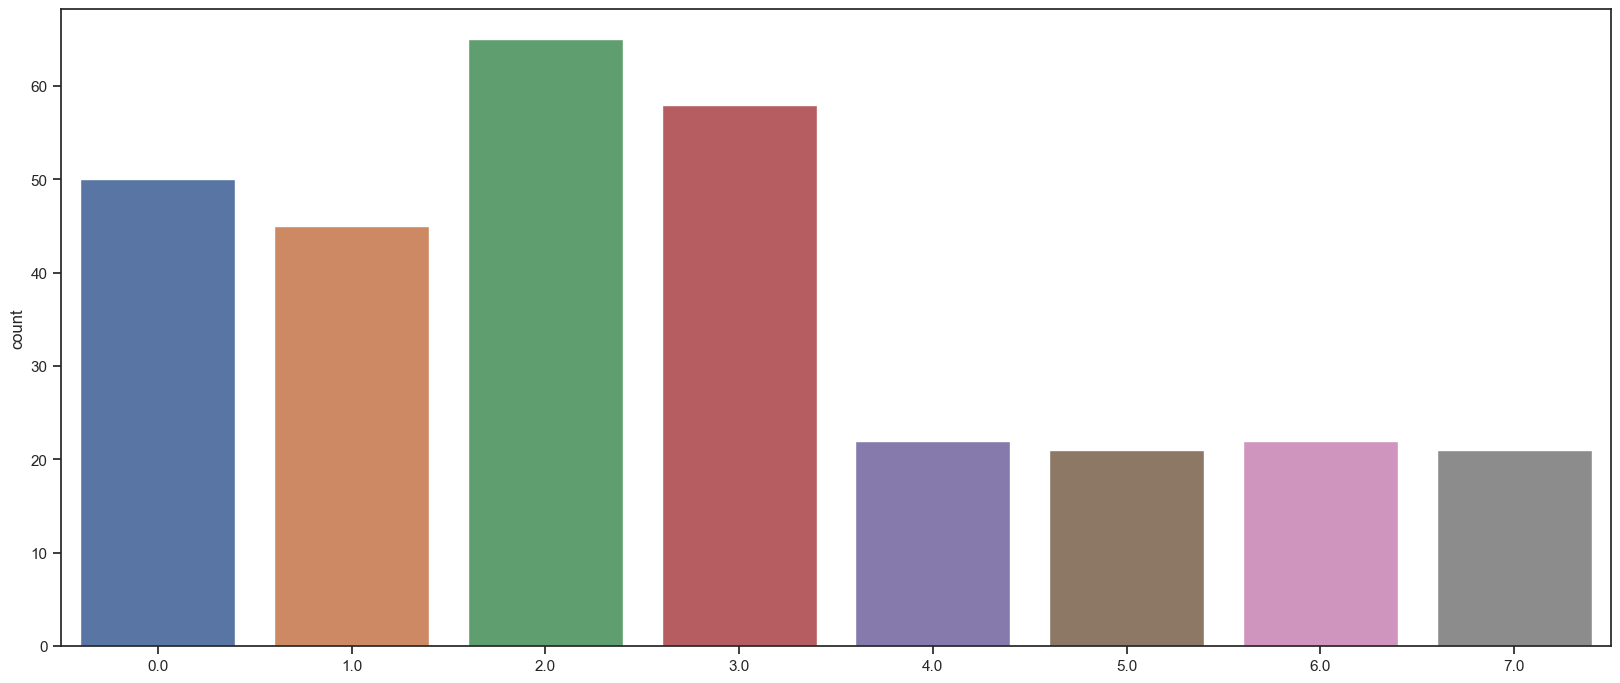

In [7]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set_style("ticks")
_ = sns.countplot(x=y_train.reshape(-1))

In [8]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("")
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (304, 66)
y_train shape: (304, 1)

X_test shape: (76, 66)
y_test shape: (76, 1)


Changing labels shape to categorical: 

In [9]:
y_train[0]

array([0.])

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

y_train shape: (304, 8)
y_test shape: (76, 8)


In [13]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [14]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (304, 66, 1)
X_test shape: (76, 66, 1)


In [15]:
class_mapping = ['thumbs_up','thumbs_down','ok','victory', 'horns', 'phone', 'one', 'point']
num_classes = 8

#2. Creating and training CNN

In [16]:
import keras
from keras import layers  
from keras import models
from keras import callbacks
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [17]:
def create_1D_model():
  model = models.Sequential()

  model.add(layers.Conv1D(32, 3, input_shape=X_train.shape[1:3], activation='relu', ))
  model.add(layers.Conv1D(16, 1, activation='relu', ))
  model.add(layers.Dropout(0.2))
  model.add(layers.MaxPooling1D(pool_size=2))

  model.add(layers.Flatten())

  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(num_classes, activation='softmax'))

  return model

In [18]:
model = create_1D_model()
model.compile(optimizer=keras.optimizers.SGD(),loss='categorical_crossentropy',metrics=['accuracy', 'Precision', 'Recall'])

In [19]:
MCP = keras.callbacks.ModelCheckpoint('./results/' + 'model_rot.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [20]:
history = model.fit(X_train, y_train, batch_size=32,epochs=100, validation_data=(X_test, y_test),callbacks=[MCP,ES,RLP],verbose=1)

Epoch 1/100
 1/10 [==>...........................] - ETA: 13s - loss: 28.1652 - accuracy: 0.0312 - precision: 0.0312 - recall: 0.0312
Epoch 1: val_accuracy improved from -inf to 0.52632, saving model to ./results\model_rot.h5
10/10 [==============================] - 2s 50ms/step - loss: 11.8632 - accuracy: 0.2763 - precision: 0.2971 - recall: 0.1711 - val_loss: 1.2087 - val_accuracy: 0.5263 - val_precision: 1.0000 - val_recall: 0.2105 - lr: 0.0100
Epoch 2/100
 1/10 [==>...........................] - ETA: 0s - loss: 1.6041 - accuracy: 0.3125 - precision: 0.5000 - recall: 0.1562
Epoch 2: val_accuracy improved from 0.52632 to 0.78947, saving model to ./results\model_rot.h5
10/10 [==============================] - 0s 15ms/step - loss: 0.9313 - accuracy: 0.6480 - precision: 0.8073 - recall: 0.5099 - val_loss: 0.4031 - val_accuracy: 0.7895 - val_precision: 0.8000 - val_recall: 0.7895 - lr: 0.0100
Epoch 3/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.5335 - accuracy: 0.7812 -

#3. CNN evaluation

In [21]:
model.evaluate(X_test, y_test, verbose=2)

3/3 - 0s - loss: 0.1913 - accuracy: 0.9342 - precision: 0.9459 - recall: 0.9211 - 22ms/epoch - 7ms/step


[0.19130350649356842,
 0.9342105388641357,
 0.9459459185600281,
 0.9210526347160339]

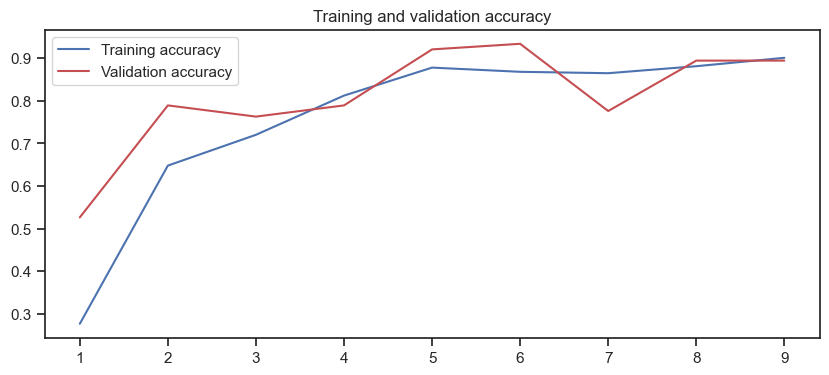

<Figure size 2000x827 with 0 Axes>

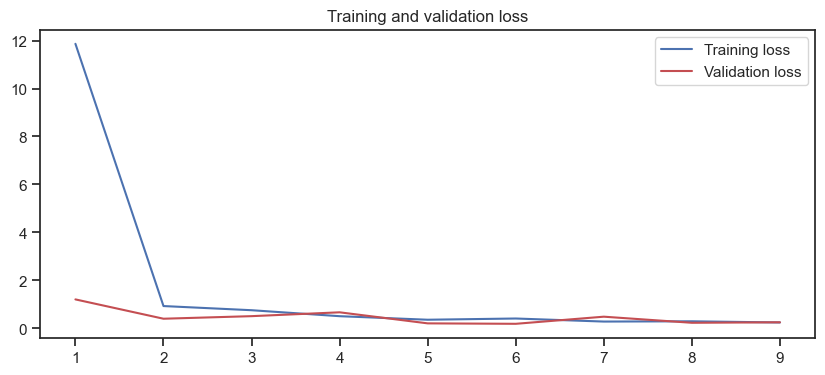

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 4))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend() 
plt.savefig('Training and validation accuracy partial rot.png',dpi=200)
plt.figure()

plt.figure(figsize=(10, 4))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
predictions = np.argmax(model.predict(X_test), axis=1)
actual = np.argmax(y_test, axis=1)

3/3 [==============================] - 0s 1ms/step


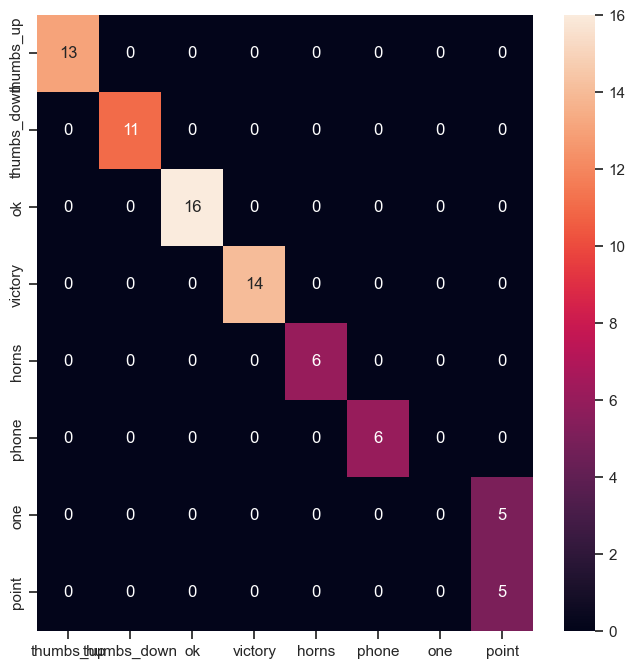

In [24]:
plt.figure(figsize=(8, 8))
cm = confusion_matrix(actual, predictions)
g = sns.heatmap(cm, annot=True, fmt='.0f')
g.set_xticklabels(class_mapping)
g.set_yticklabels(class_mapping)
plt.show()

In [25]:
y_test_temp = np.argmax(y_test, axis=1)
print(classification_report(y_test_temp, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         6
           6       0.00      0.00      0.00         5
           7       0.50      1.00      0.67         5

    accuracy                           0.93        76
   macro avg       0.81      0.88      0.83        76
weighted avg       0.90      0.93      0.91        76



d:\python-workspaces\deep-learning-tests\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python-workspaces\deep-learning-tests\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python-workspaces\deep-learning-tests\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le